In [34]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install graphviz

In [3]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [4]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [5]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [7]:
clf

DecisionTreeClassifier(criterion='entropy')

In [8]:
X = data[['X_1', 'X_2']]
y = data.Y

In [9]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

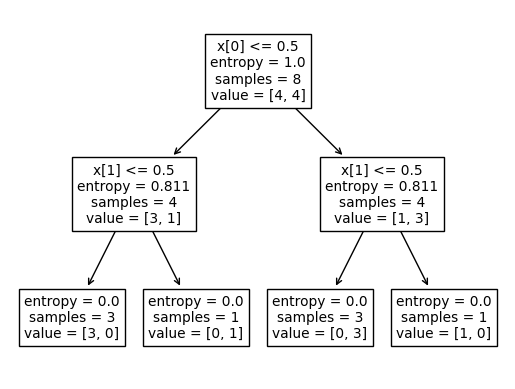

In [10]:
tree.plot_tree(clf.fit(X, y))

In [11]:
cats_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv')

In [12]:
cats_df

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


In [13]:
cats_X_wool = cats_df[['Шерстист']]
cats_X_bark = cats_df[['Гавкает']]
cats_X_climb = cats_df[['Лазает по деревьям']]

cats_Y = cats_df['Вид']

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [15]:
cats_X_wool

,Шерстист
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [16]:
clf.fit(cats_X_wool, cats_Y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.75, 'x[0] <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]')]

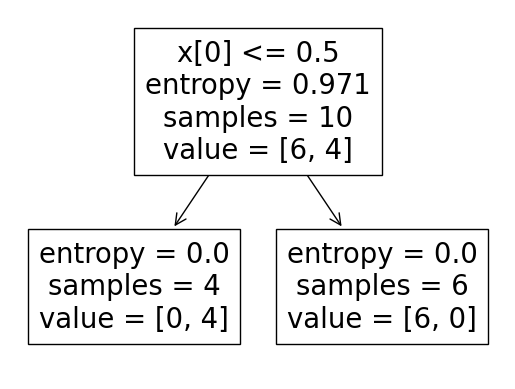

In [17]:
# tree.plot_tree(clf.fit(cats_X_wool, cats_Y))
# tree.plot_tree(clf.fit(cats_X_bark, cats_Y))
tree.plot_tree(clf.fit(cats_X_climb, cats_Y))

In [18]:
entropy = 0.971

entropy_wool = [0, 0.991]
entropy_bark = [0, 0.722]
entropy_climb = [0, 0]

ig_wool = round(entropy - (1/10 * entropy_wool[0] + 9/10 * entropy_wool[1]), 2)
ig_bark = round(entropy - (5/10 * entropy_bark[0] + 5/10 * entropy_bark[1]), 2)
ig_climb = round(entropy - (4/10 * entropy_climb[0] + 6/10 * entropy_climb[1]), 2)

In [19]:
print(ig_wool, ig_bark, ig_climb)

0.08 0.61 0.97


## step 2.3 - titanic

In [2]:
titanic_data = pd.read_csv('../titanic/train.csv')

In [3]:
titanic_data.sample(7, random_state=60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Отбросим PassengerId, Cabin, Ticket, Name

In [6]:
X = titanic_data.drop(['PassengerId', 'Cabin', 'Ticket', 'Name', 'Survived'], axis=1)
y = titanic_data.Survived

### Дерево решений может работать только с числовыми данными, номинативные переменные необходимо кодировать; NaN тоже не подходит

In [7]:
X = pd.get_dummies(X)

Заполним пропущенные значения возраста медианным значением

In [8]:
X = X.fillna({'Age': X.Age.median()})

In [9]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
X.sample(5, random_state=60)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
691,3,4.0,0,1,13.4167,1,0,1,0,0
883,2,28.0,0,0,10.5000,0,1,0,0,1
43,2,3.0,1,2,41.5792,1,0,1,0,0
626,2,57.0,0,0,12.3500,0,1,0,1,0
479,3,2.0,0,1,12.2875,1,0,0,0,1


In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [13]:
# plt.figure(figsize=(100, 25))
# tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=60)

In [16]:
clf.score(X, y)

0.9797979797979798

In [17]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
clf.score(X_train, y_train)

0.9765100671140939

In [19]:
clf.score(X_test, y_test)

0.7830508474576271

Возможно дерево переобучилось

In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [22]:
clf.score(X_train, y_train)

0.8674496644295302

In [23]:
clf.score(X_test, y_test)

0.8

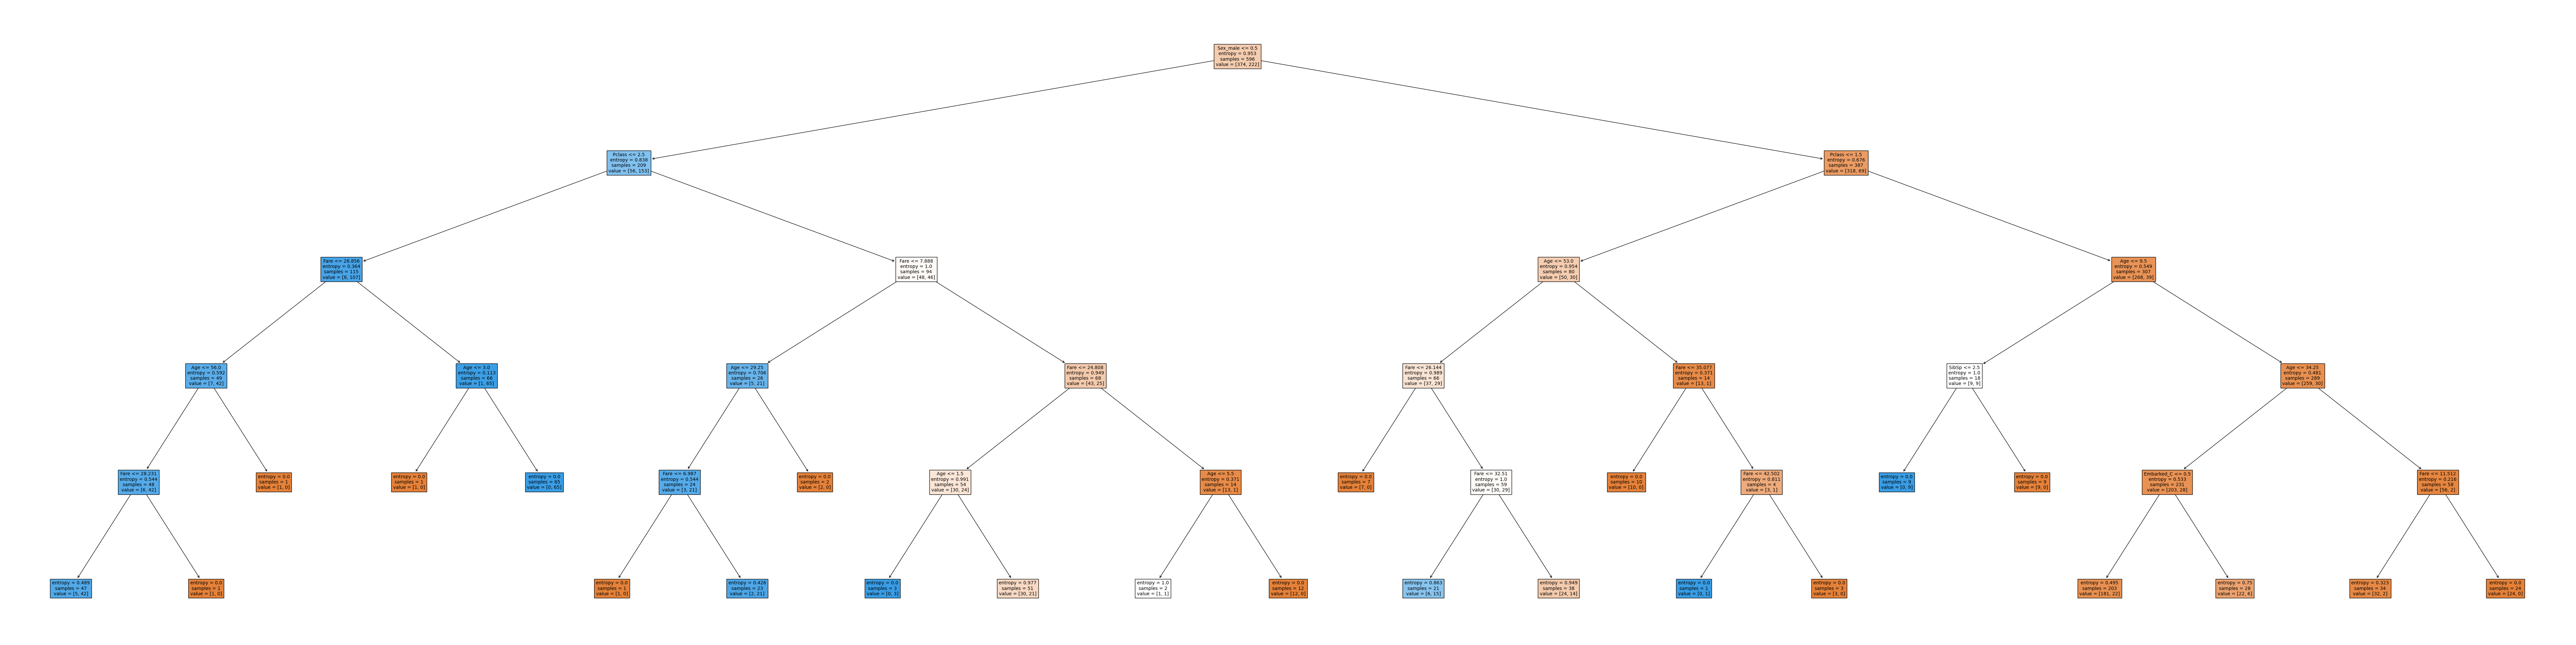

In [42]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True);

## step 2.4 - Обучение, переобучение, недообучение и кросвалидация

In [24]:
max_depth_values = range(1, 25)

In [25]:
scores_data = pd.DataFrame()

In [26]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score = pd.DataFrame({'max_depth': [max_depth], 
                               'train_score': [train_score], 
                               'test_score': test_score})
    scores_data = pd.concat([scores_data, temp_score])

In [27]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.790268,0.779661
0,2,0.793624,0.772881
0,3,0.820470,0.779661
0,4,0.842282,0.803390
0,5,0.867450,0.800000


In [28]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [29]:
scores_data_long.sample(7, random_state=60)

,max_depth,set_type,score
46,23,test_score,0.800000
16,17,train_score,0.974832
25,2,test_score,0.772881
37,14,test_score,0.786441
36,13,test_score,0.789831
12,13,train_score,0.956376
40,17,test_score,0.793220


<AxesSubplot: xlabel='max_depth', ylabel='score'>

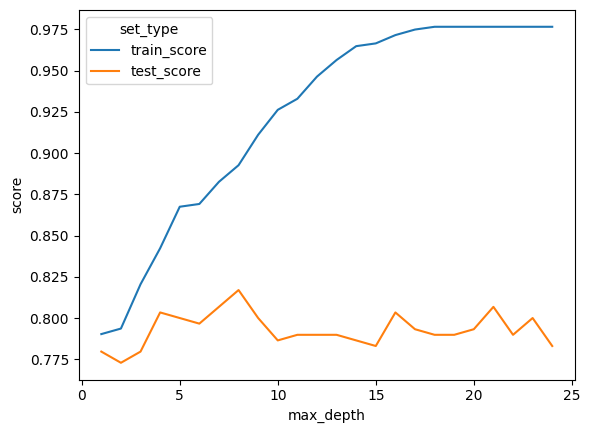

In [30]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.81666667, 0.7394958 , 0.84033613, 0.80672269, 0.82352941])

In [34]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.8053501400560223

In [35]:
max_depth_values = range(1, 25)

In [36]:
scores_data = pd.DataFrame()

In [37]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score = pd.DataFrame({'max_depth': [max_depth], 
                               'train_score': [train_score], 
                               'test_score': [test_score],
                               'cross_val_score': [mean_cross_val_score]})
    
    scores_data = pd.concat([scores_data, temp_score])
    

In [38]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.790268,0.779661,0.790168
0,2,0.793624,0.772881,0.781835
0,3,0.820470,0.779661,0.796919
0,4,0.842282,0.803390,0.805350
0,5,0.867450,0.800000,0.813683


In [39]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')

In [40]:
scores_data_long.sample(7, random_state=60)

,max_depth,set_type,score
49,2,cross_val_score,0.781835
12,13,train_score,0.956376
19,20,train_score,0.976510
13,14,train_score,0.964765
25,2,test_score,0.772881
37,14,test_score,0.793220
71,24,cross_val_score,0.758389


In [41]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
48,1,cross_val_score,0.790168
49,2,cross_val_score,0.781835
50,3,cross_val_score,0.796919
51,4,cross_val_score,0.805350
52,5,cross_val_score,0.813683
53,6,cross_val_score,0.808711
54,7,cross_val_score,0.791919
55,8,cross_val_score,0.780154
56,9,cross_val_score,0.781835
57,10,cross_val_score,0.771779


<AxesSubplot: xlabel='max_depth', ylabel='score'>

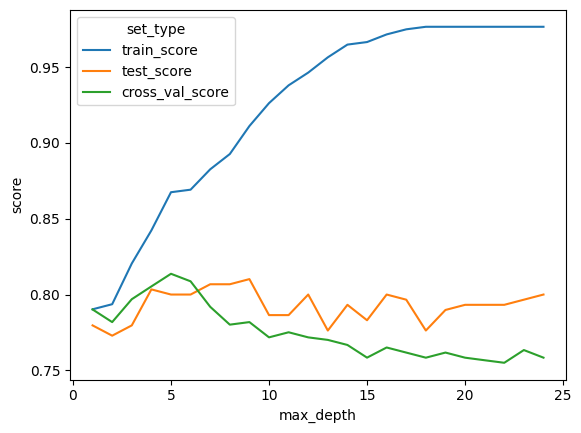

In [42]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)

In [43]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [44]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7898305084745763

## step 2.6 - ROC

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
clf = tree.DecisionTreeClassifier()

In [47]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [48]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [49]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [50]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [51]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [52]:
best_clf = grid_search_cv_clf.best_estimator_

In [53]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [58]:
from sklearn.metrics import precision_score, recall_score

In [56]:
y_pred = best_clf.predict(X_test)

In [65]:
precision_score(y_test, y_pred)

0.8571428571428571

In [59]:
recall_score(y_test, y_pred)

0.6

Вероятсть выживания для каждого из пассажиров

In [60]:
y_pred_prob = best_clf.predict_proba(X_test)

Распределение людей по вероятности их выживания и количестве

<AxesSubplot: >

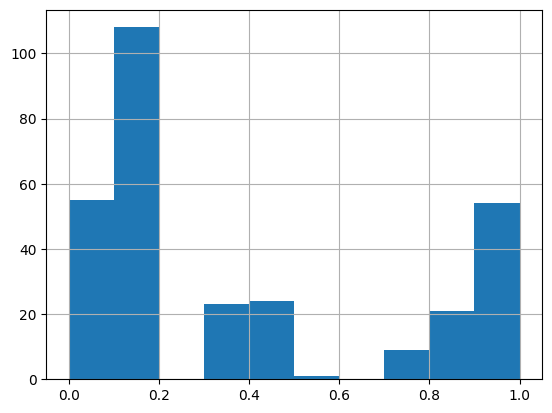

In [63]:
pd.Series(y_pred_prob[:, 1]).hist()

Пусть спасаем только тех, у кого вероятность выживания > 0.7

In [72]:
y_pred = np.where(y_pred_prob[:, 1] > 0.7, 1, 0)

In [73]:
precision_score(y_test, y_pred)

0.8571428571428571

In [74]:
recall_score(y_test, y_pred)

0.6

In [75]:
y_pred = np.where(y_pred_prob[:, 1] > 0.2, 1, 0)

In [76]:
precision_score(y_test, y_pred)

0.7272727272727273

In [77]:
recall_score(y_test, y_pred)

0.8

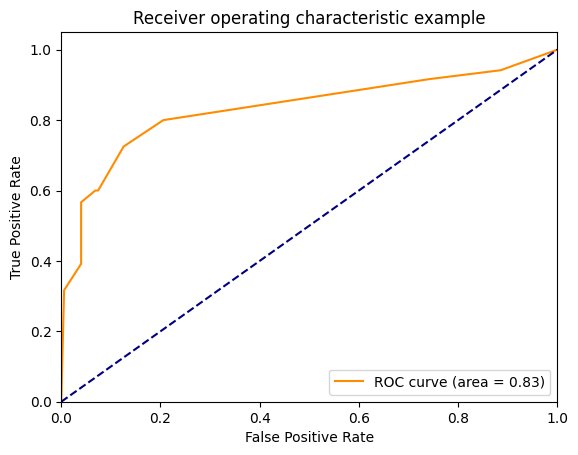

In [78]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') # not Precision
plt.ylabel('True Positive Rate') # Recall
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [2]:
pets = pd.read_csv('dogs_n_cats.csv')

In [3]:
pets.sample(7, random_state=60)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
724,7,2.8,1,0,1,котик
958,9,3.6,1,0,1,котик
241,23,27.6,1,1,0,собачка
541,10,4.0,0,0,1,котик
178,17,20.4,1,0,0,собачка
585,10,4.0,1,0,1,котик
68,16,19.2,1,1,0,собачка


In [4]:
pets = pd.get_dummies(pets)

In [65]:
pets.sample(7, random_state=60)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_котик,Вид_собачка
724,7,2.8,1,0,1,1,0
958,9,3.6,1,0,1,1,0
241,23,27.6,1,1,0,0,1
541,10,4.0,0,0,1,1,0
178,17,20.4,1,0,0,0,1
585,10,4.0,1,0,1,1,0
68,16,19.2,1,1,0,0,1


In [5]:
pets = pets.drop('Вид_котик', axis=1).rename(columns={'Вид_собачка': 'Pet'})
pets.sample(7, random_state=60)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Pet
724,7,2.8,1,0,1,0
958,9,3.6,1,0,1,0
241,23,27.6,1,1,0,1
541,10,4.0,0,0,1,0
178,17,20.4,1,0,0,1
585,10,4.0,1,0,1,0
68,16,19.2,1,1,0,1


In [10]:
X_pet = pets.drop('Pet', axis=1)
y_pet = pets.Pet

In [12]:
y.sample(7, random_state=60)

724    0
958    0
241    1
541    0
178    1
585    0
68     1
Name: Pet, dtype: uint8

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_pet, y_pet, test_size=0.3)

In [14]:
res = pd.DataFrame()
max_depth = range(2, 10)

In [17]:
for maxd in max_depth:
    
    clf_new = tree.DecisionTreeClassifier(criterion='entropy', max_depth=maxd)
    clf_new.fit(X_train, y_train)
    train_score = clf_new.score(X_train, y_train)
    test_score = clf_new.score(X_test, y_test)
    
    
    temp_score = pd.DataFrame({'max_depth': [maxd], 
                               'train_score': [train_score], 
                               'test_score': [test_score]})
    
    res = pd.concat([res, temp_score])

In [29]:
clf_new = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
clf_new.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.75, 'x[0] <= 14.5\nentropy = 0.999\nsamples = 700\nvalue = [340, 360]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 340\nvalue = [340, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 360\nvalue = [0, 360]')]

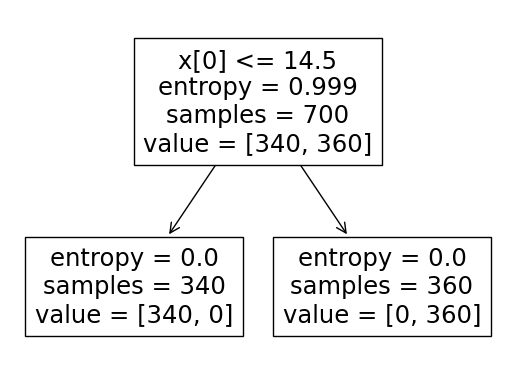

In [31]:
tree.plot_tree(clf_new)

In [18]:
res.head()

,max_depth,train_score,test_score
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0
0,6,1.0,1.0


In [19]:
scores_data_pets = pd.melt(res, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'],
                           var_name='set_type', value_name='score')

<AxesSubplot: xlabel='max_depth', ylabel='score'>

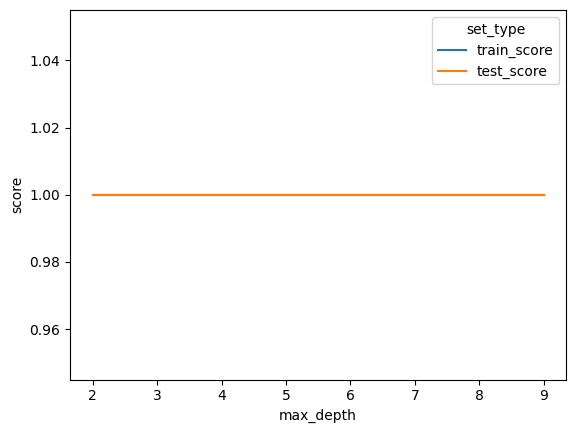

In [20]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_pets)

In [21]:
res

,max_depth,train_score,test_score
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0
0,6,1.0,1.0
0,7,1.0,1.0
0,8,1.0,1.0
0,9,1.0,1.0


In [23]:
df_ts = pd.read_json(r'dataset_209691_15.txt')

In [28]:
df_ts.tail(20)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
80,8,3.2,1,0,1
81,6,2.4,1,0,1
82,14,5.6,1,0,1
83,14,5.6,0,0,1
84,6,2.4,1,0,1
85,7,2.8,1,0,1
86,12,4.8,1,0,1
87,6,2.4,1,0,1
88,5,2.0,1,0,1
89,10,4.0,1,0,1


In [32]:
clf_new.predict(df_ts).sum()


45

In [26]:
pd.Series(result)[result == 1].count()

45

In [27]:
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## step 2.5 - metrics

In [33]:
songs = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

In [34]:
songs.sample(7, random_state=60)

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
318,happy-hawaii,1977,abba,Pop,"Agnetha, Frida Early this morning I drove in t...",937,16,0,0,0
14,age-of-false-innocence,2007,blind-guardian,Metal,Cut off the light\nTake a look\nThere's nothin...,1620,6,0,0,0
200,jfk-2-lax,2008,gangstarr,Hip-Hop,Yo\nYo premier?\nYeah whassup g?\nThat trip to...,3195,39,1,1,2
282,rock-me,2009,abba,Pop,"Rock me, give me that kick now\nRock me, show ...",1064,28,0,0,0
109,two-for-the-price-of-one,2012,abba,Pop,He had what you might call a trivial occupatio...,1372,2,0,2,0
12,take-it-personal,1992,gangstarr,Hip-Hop,I never thought that you would crab me\nUnderm...,1584,13,0,0,0
165,chiquitita,1981,abba,Pop,"Chiquitita, tell me what's wrong\nYou're encha...",1037,10,0,0,0


In [37]:
songs.nunique()

song            336
year             16
artist            3
genre             3
lyrics          316
length          294
commas           56
exclamations     12
colons            9
hyphens          25
dtype: int64

In [38]:
songs.shape

(360, 10)

## step 2.7 - practice

In [2]:
heart_ill = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')

In [3]:
heart_ill.sample(7, random_state=60)

,sex,exang,num
132,0,0,0
79,1,0,0
56,1,0,0
196,1,0,1
23,1,1,0
13,0,0,0
213,0,0,0


In [5]:
X = heart_ill.drop('num', axis=1)
y = heart_ill.num

In [4]:
ill_clf = tree.DecisionTreeClassifier(criterion='entropy')

In [6]:
ill_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

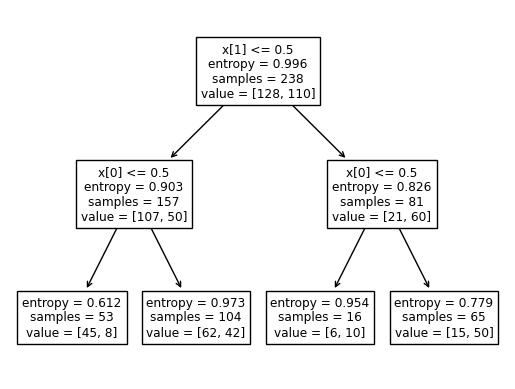

In [8]:
tree.plot_tree(ill_clf.fit(X, y));

In [9]:
entropy = 0.996
ig = entropy - (157 * 0.903 + 81 * 0.826) / 238

In [10]:
ig

0.11920588235294105

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()
X = iris.data
y = iris.target

In [16]:
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=60)

In [20]:
iris_clf = tree.DecisionTreeClassifier()

In [21]:
iris_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
predicted = iris_clf.predict(X_test)

In [28]:
parametrs = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11)}

search = GridSearchCV(tree.DecisionTreeClassifier(), parametrs, cv=5)

In [31]:
search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 11)})

In [32]:
best_tree = search.best_estimator_

In [33]:
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [35]:
search = RandomizedSearchCV(tree.DecisionTreeClassifier(), parametrs, cv=5)

In [36]:
search.fit(X,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 11),
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [37]:
best_tree = search.best_estimator_

In [38]:
search.best_params_

{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6}